
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [1]:
# Set your student number and name
student_number = None
Name = None
Last_Name = None

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.4 MB/s eta 0:00:00


##imports

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [4]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off');
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

##Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [5]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0



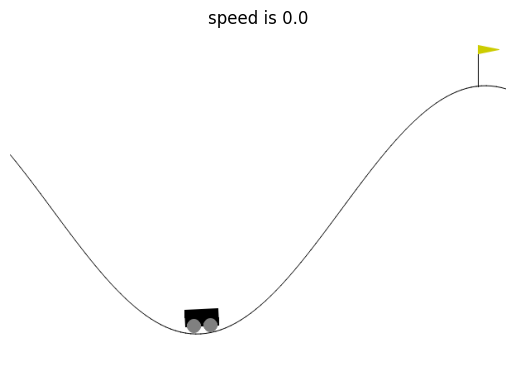

In [6]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


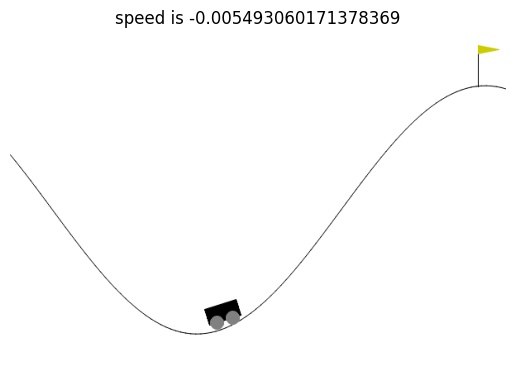

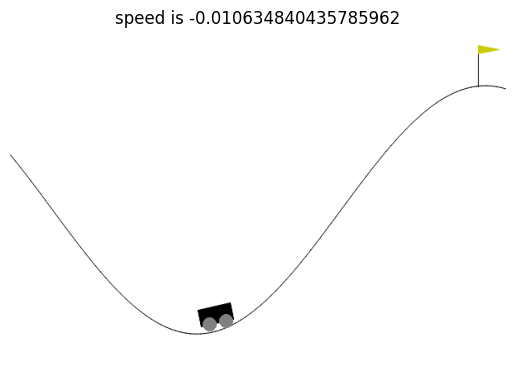

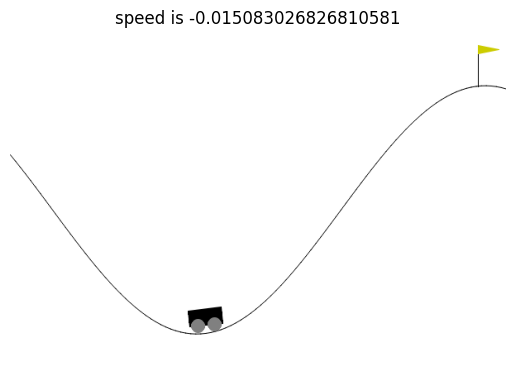

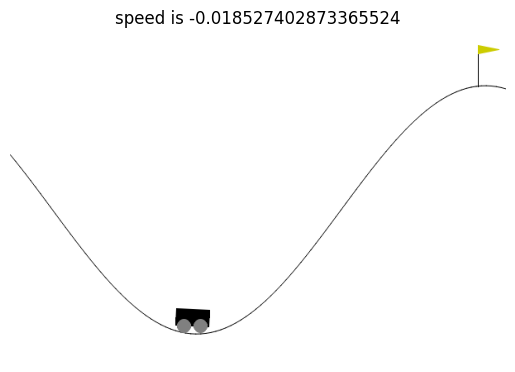

(array([-0.42489055,  0.        ], dtype=float32), {})

In [7]:
env.reset() # You can use this function to reset your environment.
######################## YOUR CODE HERE ########################
env.step(0)
env.step(0)
env.step(0)
visualize(env)
env.step(0)
env.step(0)
env.step(0)
visualize(env)
env.step(0)
env.step(0)
env.step(0)
visualize(env)
env.step(0)
env.step(0)
env.step(0)
visualize(env)

######################## END YOUR CODE #########################
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [14]:

class MountainCarQL:

    def __init__(self, env, discrete_size=20):

        self.discrete_size = discrete_size # number of states we use instead of each continuous argument of state
        self.q_values = self.create_q_values_list()
        self.policy = {}
        self.env = env


        ######################## YOUR CODE HERE ########################
        # Declare any variables you need.
        self.totalscore = 0
        self.endstate = False
        ######################## END YOUR CODE #########################




    def create_q_values_list(self):
        # initialize q_table and return it
        # use self.discrete_size
        ######################## YOUR CODE HERE ########################

        DISCRETE_OS_SIZE = [self.discrete_size] * len(env.observation_space.high)
        q_table = np.zeros(DISCRETE_OS_SIZE + [env.action_space.n])
        return q_table

        ######################## END YOUR CODE #########################



    def get_discrete_state(self, state):
        ######################## YOUR CODE HERE ########################
        # use self.discrete_size
        DISCRETE_OS_SIZE = [self.discrete_size] * len(env.observation_space.high)
        interval = self.env.observation_space.high - self.env.observation_space.low
        discrete_os_win_size = interval / DISCRETE_OS_SIZE
        discrete_state = (state - self.env.observation_space.low) / discrete_os_win_size

        return tuple(discrete_state.astype(np.int32))
        ######################## END YOUR CODE #########################



    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################

        for episode in range(num_episodes):


            discrete_state = self.get_discrete_state(env.reset()[0])

            done = False

            while not done:

                action = np.argmax(self.q_values[discrete_state])
                # if random.random() < epsilon:
                #     action = random.randint(0, 2)


                new_state, reward, terminated ,truncated ,_ = env.step(action)
                done = terminated or truncated
                new_discrete_state = self.get_discrete_state(new_state)

                if not done:
                    max_future_q = np.max(self.q_values[new_discrete_state])
                    current_q = self.q_values[discrete_state + (action, )]

                    new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
                    self.q_values[discrete_state + (action, )] = new_q
                elif new_state[0] >= env.unwrapped.goal_position:

                    print(f"You reached to the goal in episode: {episode}")
                    self.q_values[discrete_state + (action, )] = 0

                discrete_state = new_discrete_state


        ######################## END YOUR CODE #########################



    def create_policy(self):
        """
        Create your policy in this function after your agent learns the q_values.
        """
        ######################## YOUR CODE HERE ########################


        all_indexes = np.indices(self.q_values.shape[0:-1]).reshape(len(self.q_values.shape)-1, -1).T
        for state in all_indexes:
            score = -math.inf
            act = 0
            for j in range(self.env.action_space.n):

                if score < self.q_values[tuple(np.append(state,j))]:
                    score = self.q_values[tuple(np.append(state,j))]
                    act = j

            self.policy[tuple(state)] = act



        ######################## END YOUR CODE #########################

    def act(self):
        """
        Move your agent one step according to your policy.
        """
        ######################## YOUR CODE HERE ########################


        a = self.policy[self.get_discrete_state(self.env.unwrapped.state)]
        next_state, reward, terminated, truncated,_= self.env.step(a)
        self.endstate = terminated or truncated
        self.totalscore += reward

        ######################## END YOUR CODE #########################



    def evaluate(self, num_episodes):
        """
        Sample num_episodes episodes from your agent that acts according to your policy.
        Then return the average rewards it gets and percentage of episodes that your car reached the goal.

        Inputs:
            - num_episodes: Number of episodes for sampling.
        Returns:
            tuple: average reward and win percentage
        """
        ######################## YOUR CODE HERE ########################
        sum = 0
        win = 0
        for i in range(num_episodes):
            self.env.reset()
            self.totalscore = 0
            self.endstate = False

            while not self.endstate:
                self.act()
            if self.totalscore != -200:
                win += 1

            sum += self.totalscore
        return sum/num_episodes, 100*win/num_episodes

        ######################## END YOUR CODE #########################

train your agent with good parameters

In [15]:
EPISODES = 10000
LEARNING_RATE = 0.2
DISCOUNT = 0.95
EPSILON = 0.20


mountain_car_ql = MountainCarQL(env,discrete_size=30)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)


Streaming output truncated to the last 5000 lines.
You reached to the goal in episode: 4571
You reached to the goal in episode: 4572
You reached to the goal in episode: 4573
You reached to the goal in episode: 4574
You reached to the goal in episode: 4575
You reached to the goal in episode: 4576
You reached to the goal in episode: 4577
You reached to the goal in episode: 4578
You reached to the goal in episode: 4579
You reached to the goal in episode: 4580
You reached to the goal in episode: 4581
You reached to the goal in episode: 4582
You reached to the goal in episode: 4583
You reached to the goal in episode: 4584
You reached to the goal in episode: 4585
You reached to the goal in episode: 4586
You reached to the goal in episode: 4587
You reached to the goal in episode: 4588
You reached to the goal in episode: 4589
You reached to the goal in episode: 4590
You reached to the goal in episode: 4591
You reached to the goal in episode: 4593
You reached to the goal in episode: 4594
You re

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [16]:


mountain_car_ql.create_policy()
print(mountain_car_ql.evaluate(300))



(-141.83666666666667, 97.33333333333333)


show the path your car took for only one episode. Use visualize function every 10 frame.

0


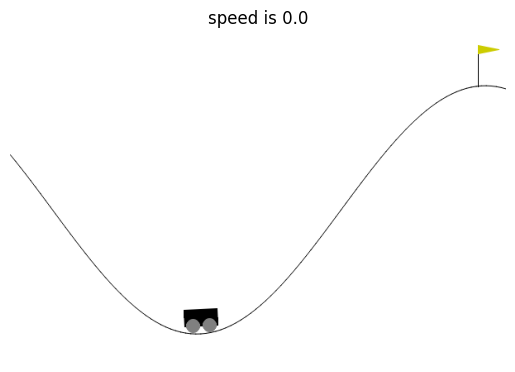

10


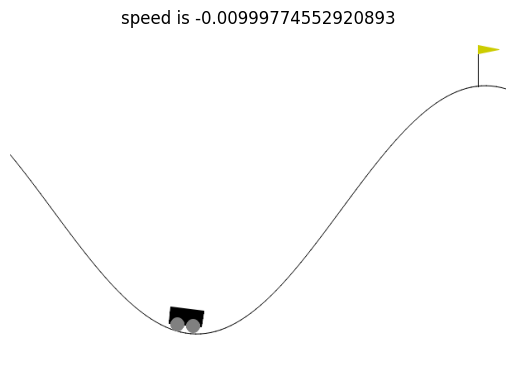

20


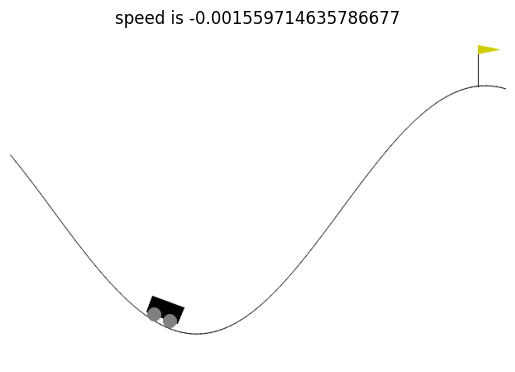

30


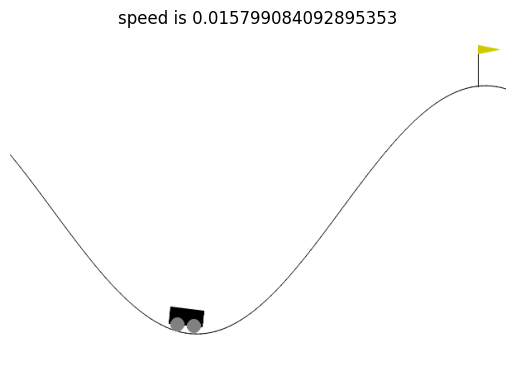

40


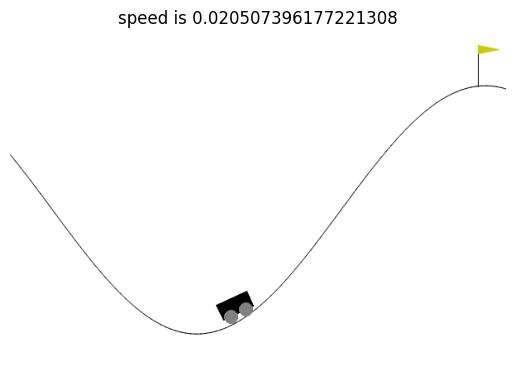

50


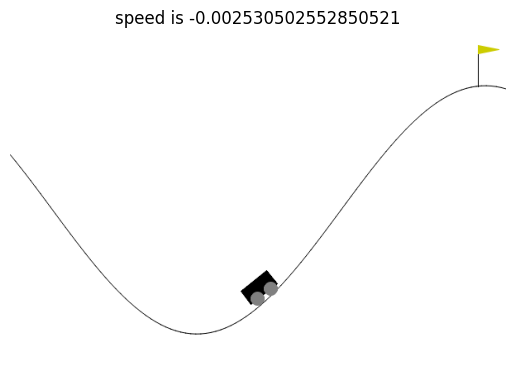

60


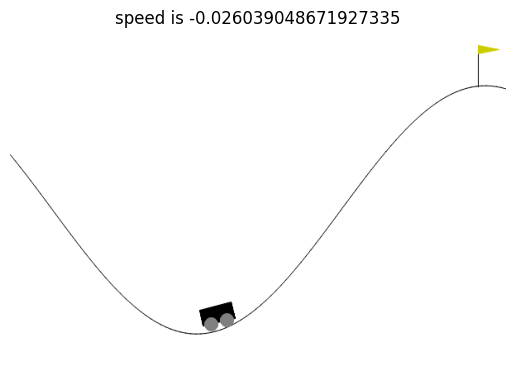

70


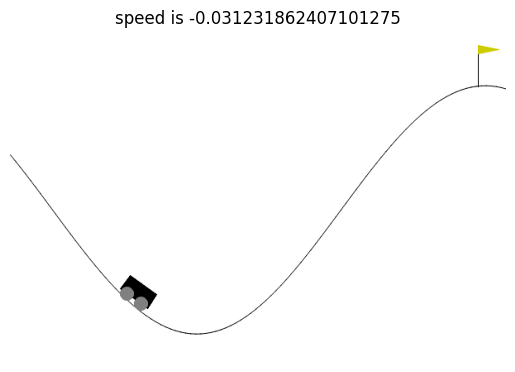

80


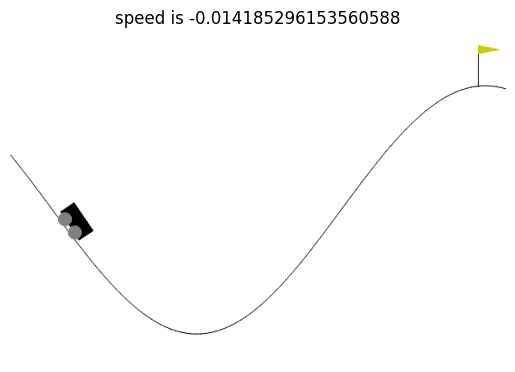

90


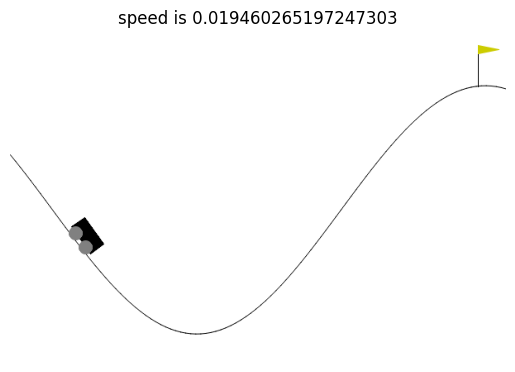

100


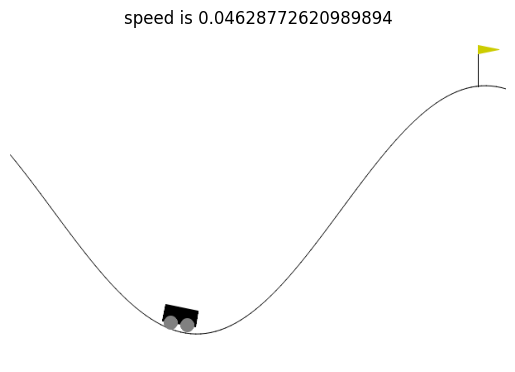

110


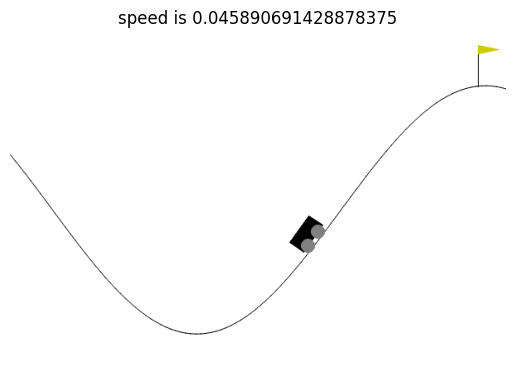

120


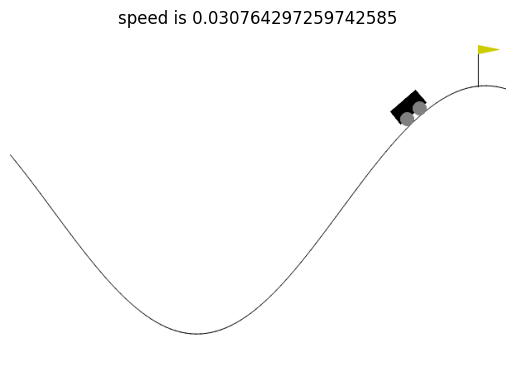

-129.0


In [17]:
mountain_car_ql.env.reset()
mountain_car_ql.totalscore = 0
mountain_car_ql.endstate = False
index = 0
while not mountain_car_ql.endstate:
    if index%10==0:
        print(index)
        visualize(env)
    mountain_car_ql.act()
    index += 1
print(mountain_car_ql.totalscore)

##SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [18]:
class MountainCarSarsa(MountainCarQL):

    def learn(self, num_episodes, alpha, gamma, epsilon):
    ######################## YOUR CODE HERE ########################

        for episode in range(num_episodes):


            discrete_state = self.get_discrete_state(env.reset()[0])

            done = False
            action = np.argmax(self.q_values[discrete_state])
            if random.random() < epsilon:
                action = random.randint(0, 2)
            index = 0
            while not done:



                new_state, reward, terminated ,truncated ,_ = env.step(action)
                done = terminated or truncated
                new_discrete_state = self.get_discrete_state(new_state)

                new_action = np.argmax(self.q_values[new_discrete_state])
                if random.random() < epsilon:
                    new_action = random.randint(0, 2)

                if not done:
                    future_q = self.q_values[new_discrete_state][new_action]

                    current_q = self.q_values[discrete_state + (action, )]

                    new_q = (1 - alpha) * current_q + alpha * (reward + gamma * future_q)
                    self.q_values[discrete_state + (action, )] = new_q
                elif new_state[0] >= env.unwrapped.goal_position:

                    print(f"Congratulation! We reached to the goal! Episode: {episode}, index: {index}")
                    self.q_values[discrete_state + (action, )] = 0

                discrete_state = new_discrete_state
                action = new_action
                index+=1


    ######################## END YOUR CODE #########################


train your agent with good parameters

In [19]:
EPISODES = 10000
LEARNING_RATE = 0.3
DISCOUNT = 0.95
EPSILON = 0.30


mountain_car_sarsa = MountainCarSarsa(env,discrete_size=30)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)


Congratulation! We reached to the goal! Episode: 918, index: 160
Congratulation! We reached to the goal! Episode: 922, index: 167
Congratulation! We reached to the goal! Episode: 940, index: 176
Congratulation! We reached to the goal! Episode: 977, index: 194
Congratulation! We reached to the goal! Episode: 1076, index: 194
Congratulation! We reached to the goal! Episode: 1118, index: 168
Congratulation! We reached to the goal! Episode: 1119, index: 168
Congratulation! We reached to the goal! Episode: 1122, index: 195
Congratulation! We reached to the goal! Episode: 1124, index: 163
Congratulation! We reached to the goal! Episode: 1129, index: 167
Congratulation! We reached to the goal! Episode: 1130, index: 166
Congratulation! We reached to the goal! Episode: 1146, index: 175
Congratulation! We reached to the goal! Episode: 1151, index: 172
Congratulation! We reached to the goal! Episode: 1171, index: 176
Congratulation! We reached to the goal! Episode: 1188, index: 178
Congratulation

evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [20]:


mountain_car_sarsa.create_policy()
print(mountain_car_sarsa.evaluate(300))



(-174.89333333333335, 69.66666666666667)


show the path your car took for only one episode. Use visualize function every 10 frame.

0


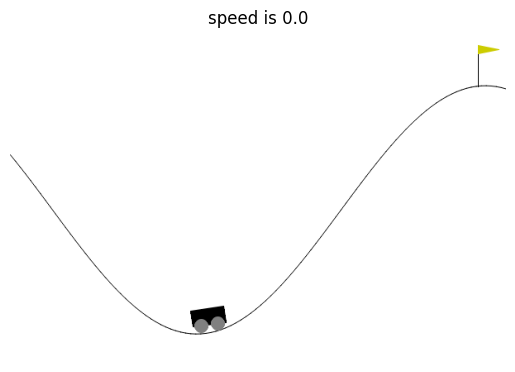

10


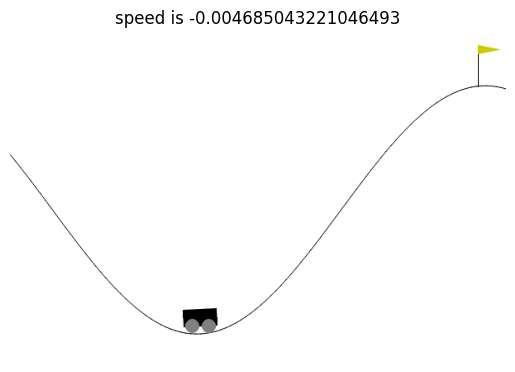

20


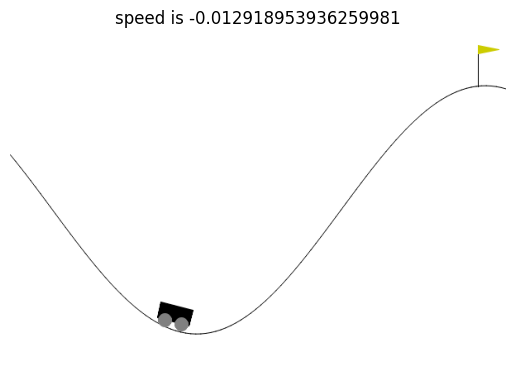

30


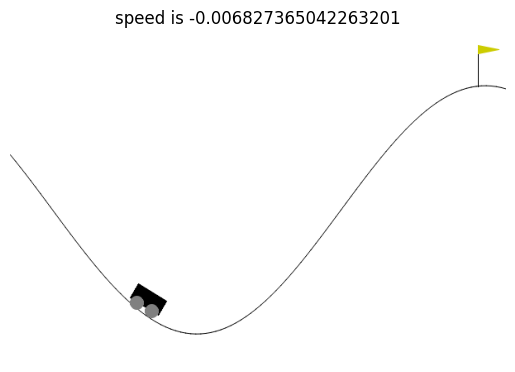

40


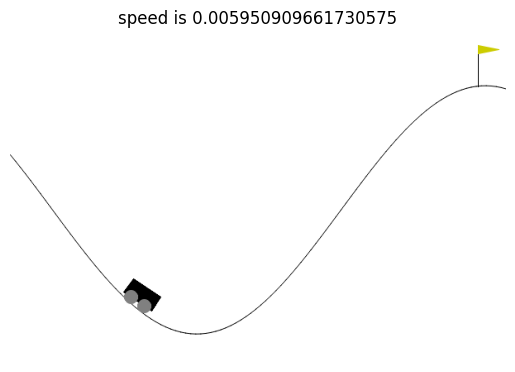

50


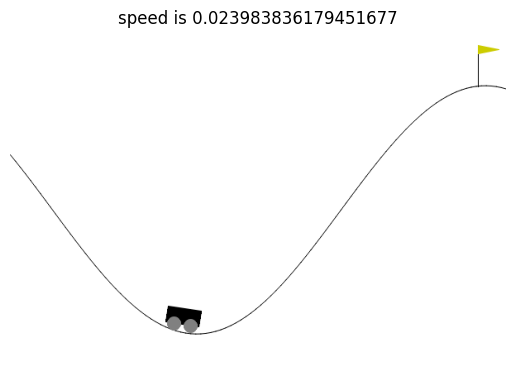

60


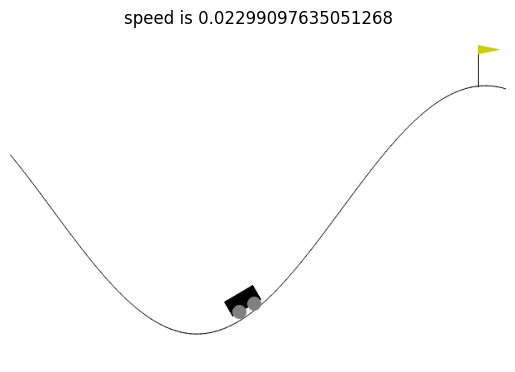

70


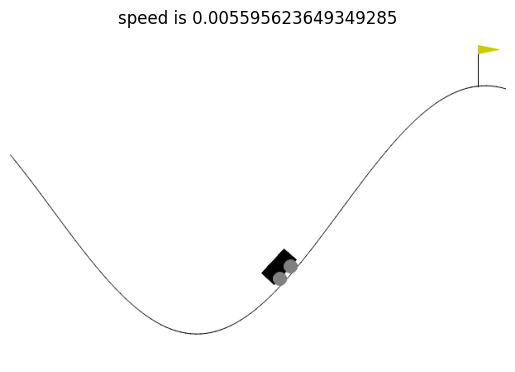

80


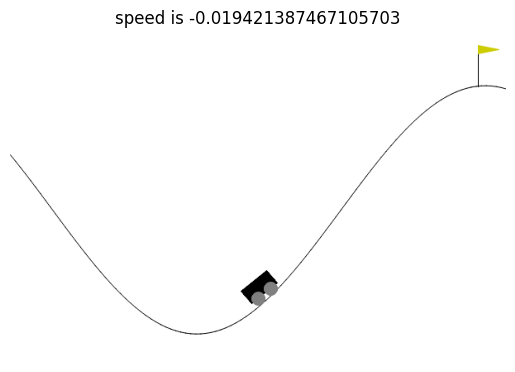

90


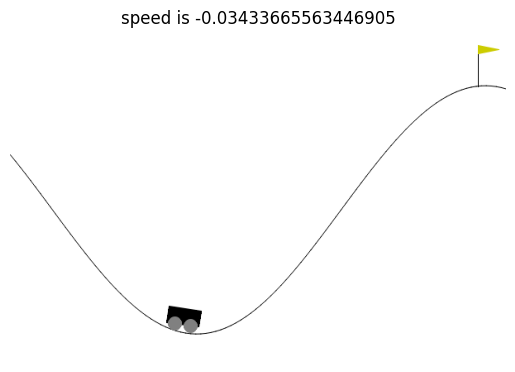

100


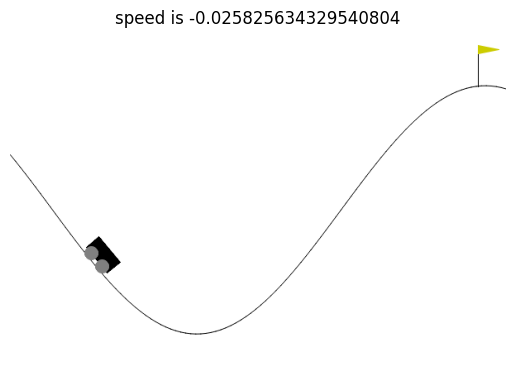

110


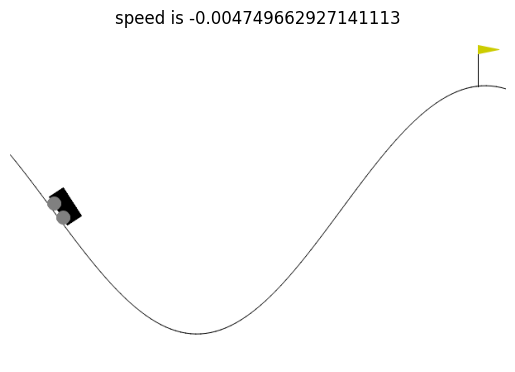

120


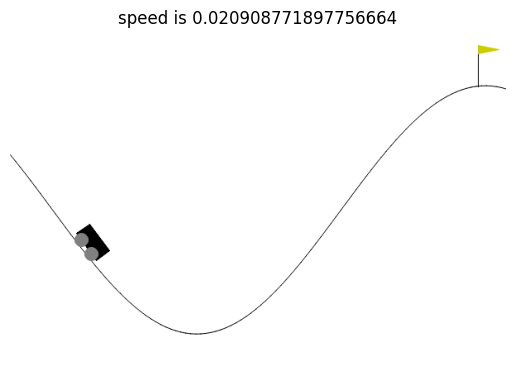

130


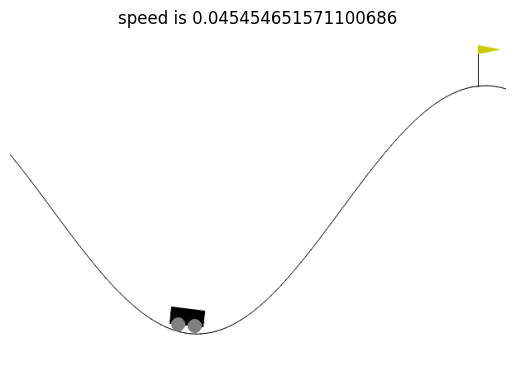

140


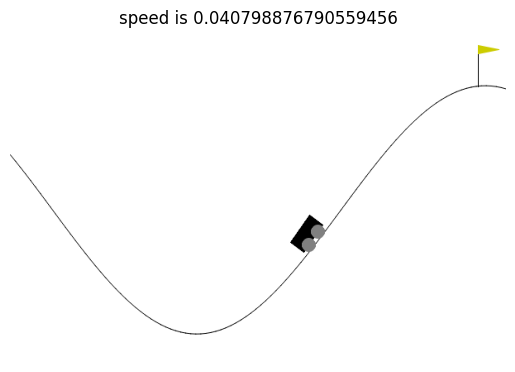

150


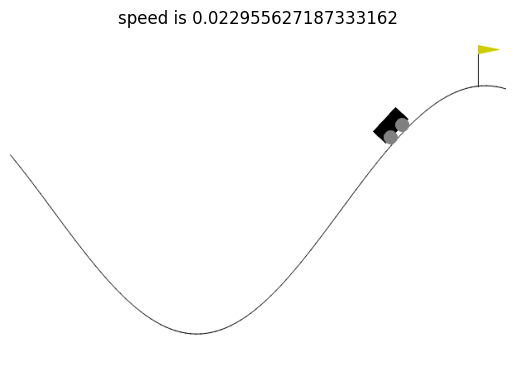

160


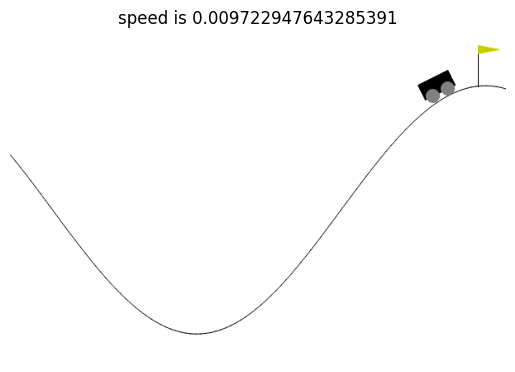

170


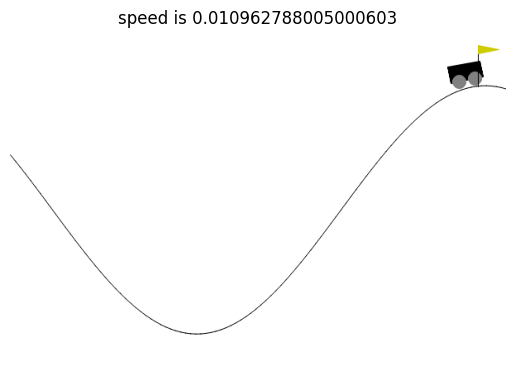

-174.0


In [21]:
mountain_car_sarsa.env.reset()
mountain_car_sarsa.totalscore = 0
mountain_car_sarsa.endstate = False
index = 0
while not mountain_car_sarsa.endstate:
    if index%10==0:
        print(index)
        visualize(env)
    mountain_car_sarsa.act()
    index += 1
print(mountain_car_sarsa.totalscore)

Is there any difference between the two algorithms? Compare results and explain why.

Answer:...

we see that it has enough velocity to reach goal on top on left mountain but it still moves left be more sure about the results. bacuse sarsa see the next action and updates and next action could contain noise . sarsa has worse average bacause of that in evaluating without noise